In [13]:
import matplotlib.pyplot as plt
import pandas as pd

from functions import *

Let $X \sim U[-2,2]$ and 

\begin{equation}
Y_i=a\left\{X_i+2 \exp \left(-16 X_i^2\right)\right\}+\sigma\left(X_i\right) \varepsilon_i
\end{equation}

where $\varepsilon \sim \mathcal{N} \left(0,1\right)$.

The variance function is described by

\begin{equation}
\sigma \left(x \right) = 0.4 \exp \left(-2 x^2\right)+0 \cdot 2
\end{equation}



We estimate the relationship with the Nadaraya-Watson estimator

\begin{equation}
m_{n} \left(x\right) = \frac{
\sum_{i=1}^{n} Y_{i} K \left(
    \frac{x-X_{i} }{h}
    \right)
}{\sum_{i=1}^{n} K \left(
    \frac{x-X_{i} }{h}
    \right)}.
\end{equation}

We assume that the predictor $X$ is missing at random and is observed with the probability of observation
\begin{equation}
\pi \left(Y_i\right) = \frac{1}{1+\exp^{-\left(\beta_{0} +\beta_{1}Y_{i}\right)}}
\end{equation}

that is modelled with the logit function.

If $\pi \left(y \right)$ is known, the Horwitz-Thompson estimator is 
\begin{equation}
m_{n} \left(x\right) = \frac{
\sum_{i=1}^{n} 
\frac{\Omega_{i}Y_{i}}{
\pi \left(Y_{i} \right)
}
 K \left(
    \frac{x-X_{i} }{h}
    \right)
}{\sum_{i=1}^{n} 
\frac{\Omega_{i}}{
\pi \left(Y_{i} \right)
}
K \left(
    \frac{x-X_{i} }{h}
    \right)},
\end{equation}

If  $\pi \left(y \right)$ is unknown, we estimate it with 

In [2]:
#Setting 
#Hyperparameter set-up

n = 1000
h=0.2
a=0.5

b0 = -1
b1 = -1

#Data generation 
X = np.random.uniform(-2,2,n)
X.sort()

eps = eps(0, 1,  n)

y = fan(X,n,a,eps)

omega = bernoulli.rvs(pi(y,b0,b1), size=n)

pi_hat = [pi_hat(h,z,y,pi(y,b0,b1),omega) for z in np.linspace(-1, 1, n)]


In [3]:
sum(omega)/n

0.263

(-1.5, 1.5)

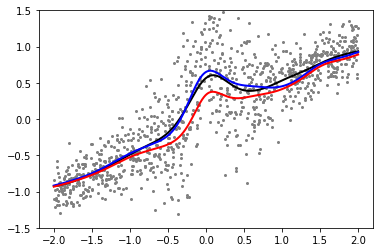

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, y, 'o', color='grey',markersize=2)
#NW
ax.plot(np.linspace(-2, 2, n),[nw(h,t,X,y) for t in np.linspace(-2, 2, n)],color= 'black', lw=2)

#HT NW
ax.plot(np.linspace(-2, 2, n),[nw_mis(h,t,X,y,pi(y,b0,b1),omega) for t in np.linspace(-2, 2, n)],'-g',color= 'blue', lw=2)
#
ax.plot(np.linspace(-2, 2, n),[nw_mis(h,t,X,y,pi_hat,omega) for t in np.linspace(-2, 2, n)],'-g',color= 'red', lw=2)
ax.set_ylim(-1.5,1.5)

In [5]:
#We need to simulate MAR missing values in the predictor 
h= 0.25

p = pi(y,b0,b1)
omega = bernoulli.rvs(p, size=n)

y_hat = [nw_mis(h,t,X,y,p,omega) for t in np.linspace(0, 1, n)]
np.mean((y-y_hat)**2)


0.7401226201208508

In [ ]:
## The MSE plots do not seem correct 

In [14]:
gen = []

#Bias 
monte = 10 
for m in range(monte):
    X = np.random.uniform(-2,2,n)
    X.sort()
    eps1 = eps(0, 1,  n)
    y = fan(X,n,a,eps1)
    gen.append(nw_mis(h,X,X,y,pi(y,b0,b1),omega))
    

In [22]:
np.mean(gen) - fan(np.random.uniform(-2,2),1,a,0)

0.4914678108543262

In [6]:
#MSE plots 
mse_nw = []
mse_hw = []
mse_hw_est = []
mse_cc = []

#NW
y_hat_nw = [(fan(t,1,a,eps)- nw(h,t,X,y))**2 for t in np.linspace(0, 1, n)]
mse_nw.append(np.mean((y-y_hat_nw)**2))

#CC
#y_hat_cc = [nw_cc(h,t,X,y,pi(y,b0,b1),n) for t in np.linspace(0, 1, n)]
#mse_cc.append(np.mean((y-y_hat_cc)**2))

#HW
y_hat_hw = [(fan(X,n,a,eps)-nw_mis(h,t,X,y,pi(y,b0,b1),omega))**2 for t in np.linspace(0, 1, n)]
mse_hw.append(np.mean((y-y_hat_hw)**2))

# MAR estimated
y_hat_hw_est = [(fan(X,n,a,eps)-nw_mis(h,t,X,y,pi_hat,omega))**2  for t in np.linspace(0, 1, n)]
mse_hw_est.append(np.mean((y-y_hat_hw_est)**2))




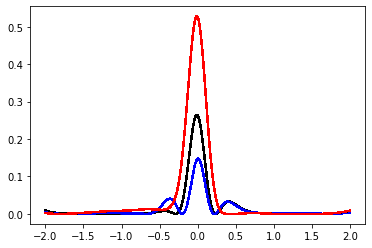

In [7]:
fig, ax = plt.subplots(1, 1)

h = 0.25

#NW
ax.plot(np.linspace(-2, 2, n), [(fan(t,n,a,eps)-sigma(t)*eps - nw(h,t,X,y))**2 for t in np.linspace(-2, 2, n)] ,color= 'black')

#HT NW
ax.plot(np.linspace(-2, 2, n), [(fan(t,n,a,eps)-sigma(t)*eps -nw_mis(h,t,X,y,pi(y,b0,b1),omega))**2 for t in np.linspace(-2, 2, n)], color='blue')
        
#HW EST 
ax.plot(np.linspace(-2, 2, n), [(fan(t,n,a,eps)-sigma(t)*eps -nw_mis(h,t,X,y,pi_hat,omega))**2 for t in np.linspace(-2, 2, n)] , color='red')
        
plt.show()        
#
#ax.plot(np.linspace(-2, 2, n),(y - y_hat_hw_est)**2,'-g',color= 'red', lw=2)
#ax.set_ylim(-1.5,1.5)